In [30]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [22]:
# Import data
df_train = pd.read_csv("./data/training.csv")
df_test = pd.read_csv("./data/testing.csv")
df_train, df_test

(     class    GLCM_pan  Mean_Green    Mean_Red    Mean_NIR     SD_pan
 0        w  120.362774  205.500000  119.395349  416.581395  20.676318
 1        w  124.739583  202.800000  115.333333  354.333333  16.707151
 2        w  134.691964  199.285714  116.857143  477.857143  22.496712
 3        w  127.946309  178.368421   92.368421  278.473684  14.977453
 4        w  135.431548  197.000000  112.690476  532.952381  17.604193
 ...    ...         ...         ...         ...         ...        ...
 4334     n  111.568773  203.588235   93.264706  403.735294  26.512777
 4335     n  125.435240  206.394161   93.058394  512.270073  33.466060
 4336     n  132.123859  465.343750  295.333333  499.250000  38.762967
 4337     n  124.469536  215.152632   98.484211  675.915789  28.506542
 4338     n  125.171928  559.048000  365.968000  439.272000  15.392322
 
 [4339 rows x 6 columns],
     class    GLCM_pan  Mean_Green    Mean_Red    Mean_NIR     SD_pan
 0       n  109.828571  183.700000   82.950000  25

In [ ]:
df_train = df_train.drop(['class'], axis=1)
df_test = df_test.drop(['class'], axis=1)

In [23]:
# data preprocessing
X_train = df_train.fillna(0).drop("SD_pan", axis=1).values
X_test = df_test.fillna(0).drop("SD_pan", axis=1).values

y_train = df_train.fillna(0)["SD_pan"].values
y_test = df_test.fillna(0)["SD_pan"].values

X_train, y_train

(array([[120.3627737 , 205.5       , 119.3953488 , 416.5813953 ],
        [124.7395833 , 202.8       , 115.3333333 , 354.3333333 ],
        [134.6919643 , 199.2857143 , 116.8571429 , 477.8571429 ],
        ...,
        [132.1238592 , 465.34375   , 295.3333333 , 499.25      ],
        [124.4695364 , 215.1526316 ,  98.48421053, 675.9157895 ],
        [125.171928  , 559.048     , 365.968     , 439.272     ]]),
 array([20.67631835, 16.70715083, 22.49671178, ..., 38.76296686,
        28.50654248, 15.39232155]))

In [29]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
X_test.shape, y_pred.shape


((500, 4), (500,))

In [27]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [-0.02614269 -0.0291286   0.07129446  0.007515  ]
Mean squared error: 66.71
Coefficient of determination: -0.46


In [47]:
# ii) Funktion, die fur das Attribut Mean Red basierend auf dem Attribut Mean Green vorhersagt.
X_train_ = np.vstack(df_train.fillna(0)["Mean_Green"].values)
X_test_ = np.vstack(df_test.fillna(0)["Mean_Green"].values)

y_train_ = df_train.fillna(0)["Mean_Red"].values
y_test_ = df_test.fillna(0)["Mean_Red"].values

X_train_, y_train_

(array([[205.5      ],
        [202.8      ],
        [199.2857143],
        ...,
        [465.34375  ],
        [215.1526316],
        [559.048    ]]),
 array([119.3953488 , 115.3333333 , 116.8571429 , ..., 295.3333333 ,
         98.48421053, 365.968     ]))

In [48]:
# Create linear regression object
regr_ = linear_model.LinearRegression()
# Train the model using the training sets
regr_.fit(X_train_, y_train_)

# Make predictions using the testing set
y_pred_ = regr_.predict(X_test_)

In [50]:
# The coefficients
print("Coefficients: \n", regr_.coef_)
print("Constante: \n", regr_.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_, y_pred_))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_, y_pred_))

Coefficients: 
 [0.96394292]
Constante: 
 -108.18046794897779
Mean squared error: 382.78
Coefficient of determination: 0.93


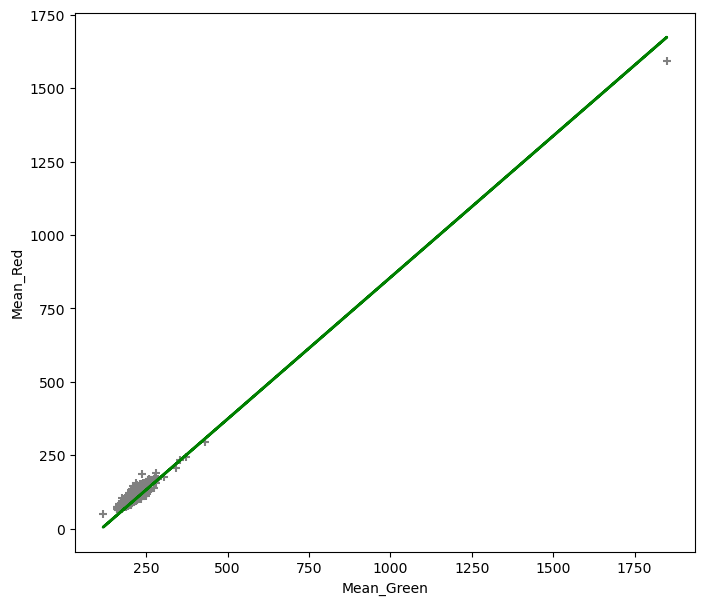

In [58]:
# Plot outputs
plt.figure(1, figsize=(8,7))
plt.scatter(X_test_, y_test_, color="gray", marker='+')
plt.plot(X_test_, y_pred_, color="green", linewidth=2)

plt.ylabel("Mean_Red")
plt.xlabel("Mean_Green")

#plt.xticks(())
#plt.yticks(())

plt.show()